# DATA SCIENCE INTERVIEW PROJECT

## OVERALL TASK
In this project, you'll work with a dataset of homes for sale in Brazil. Your goal is to determine if there are regional differences in the real estate market. Also, you will look at southern Brazil to see if there is a relationship between home size and price.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px, nbconvert
from plotly.offline import plot

#### Task 1: DATA CLEANING of `brasil-real-estate-1.csv` raw data.

Task 1.1: Import the CSV file into the DataFrame `df1`.

In [2]:
df1 = pd.read_csv("./brasil-real-estate-1.csv")
df1

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"
...,...,...,...,...,...,...
12829,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.056418,-34.909309",91.0,"$174,748.79"
12830,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.1373477,-34.909181",115.0,"$115,459.02"
12831,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,"-8.1136717,-34.896252",76.0,"$137,302.62"
12832,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,NaN,130.0,"$234,038.56"


Task 1.2: Before you move to the next task, take a moment to inspect df1 using the info and head methods. What issues do you see in the data? What cleaning will you need to do before you can conduct your analysis?

In [3]:
print(df1.info())
print(df1.isnull().sum())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB
None
property_type                 0
place_with_parent_names       0
region                        0
lat-lon                    1283
area_m2                       0
price_usd                     0
dtype: int64
(12834, 6)


Task 1.3: Use the `"lat-lon"` column to create two separate columns in `df1`: `"lat"` and `"lon"`. Make sure that the data type for these new columns is `float`.

In [4]:
df1[['lat','lon']] = df1['lat-lon'].str.split(",", expand=True).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
dtypes: float64(3), object(5)
memory usage: 802.3+ KB


Task 1.4: Use the `"place_with_parent_names"` column to create a `"state"` column for `df1`. (Note that the state name always appears after `"|Brasil|"` in each string.)

In [5]:
df1['state'] = df1['place_with_parent_names'].str.split('|', expand=True)[2]
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227,Alagoas


Task 1.5: Transform the `"price_usd"` column of `df1` so that all values are floating-point numbers instead of strings.

In [6]:
df1['price_usd'] = df1["price_usd"].str.replace("$","").str.replace(",","").astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  float64
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
 8   state                    12834 non-null  object 
dtypes: float64(4), object(5)
memory usage: 902.5+ KB


Task 1.6: Drop the `"lat-lon"` and `"place_with_parent_names"` columns from `df1`.

In [7]:
df1.drop(columns=["place_with_parent_names","lat-lon"], inplace=True)
df1

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...
12829,apartment,Northeast,91.0,174748.79,-8.056418,-34.909309,Pernambuco
12830,apartment,Northeast,115.0,115459.02,-8.137348,-34.909181,Pernambuco
12831,apartment,Northeast,76.0,137302.62,-8.113672,-34.896252,Pernambuco
12832,apartment,Northeast,130.0,234038.56,NaN,NaN,Pernambuco


Task 1.7: Give a short report on the data you now have.

In [8]:
df1.describe()

,area_m2,price_usd,lat,lon
count,12834.000000,12834.000000,11551.000000,11551.000000
mean,116.687003,181858.080565,-16.182759,-43.942239
std,48.260754,96623.326207,7.254958,5.001383
min,53.000000,74892.340000,-29.995461,-60.057747
25%,78.000000,109217.990000,-20.365431,-49.236000
50%,105.000000,152905.190000,-18.913077,-43.944378
75%,145.000000,224677.020000,-12.971690,-38.506627
max,252.000000,524246.390000,0.020423,-34.804455


In [9]:
df1.isnull().sum()


property_type       0
region              0
area_m2             0
price_usd           0
lat              1283
lon              1283
state               0
dtype: int64

In [10]:
df1.dropna(inplace=True)
df1.shape

(11551, 7)

#### TASK 2: DATA CLEANING of `brasil-real-estate-2.csv` raw data.

Task 2.1: Import the CSV file `brasil-real-estate-2.csv` into the DataFrame `df2`

In [11]:
df2 = pd.read_csv("./brasil-real-estate-2.csv")
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


Task 2.2: Before you jump to the next task, look at `df2` using the `info` and `head` methods. What issues do you see in the data? How is it similar or different from `df1`?

In [12]:
print(df1.columns)
print(df2.columns)
print(df2.isnull().sum())
print(df2.shape)

Index(['property_type', 'region', 'area_m2', 'price_usd', 'lat', 'lon',
       'state'],
      dtype='object')
Index(['property_type', 'state', 'region', 'lat', 'lon', 'area_m2',
       'price_brl'],
      dtype='object')
property_type       0
state               0
region              0
lat                 0
lon                 0
area_m2          1540
price_brl           0
dtype: int64
(12833, 7)


Task 2.3: Use the `price_brl` column to create a new column named `price_usd`. (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In [13]:
df2['price_usd'] = df2.price_brl/3.19
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


Task 2.4: Drop the `"price_brl"` column from `df2`, as well as any rows that have `NaN` values.

In [14]:
df2.drop("price_brl", axis=1, inplace=True)
df2.dropna(inplace=True)
df2.head()
df2.shape

(11293, 7)

Task 2.5: Concatenate `df1` and `df2` to create a new DataFrame named `df`. 

In [15]:
df = pd.concat([df1,df2], axis=0)
df

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.850000,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.370000,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.450000,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.200000,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.710000,-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...
12827,house,Southeast,180.0,131414.921630,-23.595098,-46.796448,São Paulo
12828,house,Southeast,250.0,134543.852665,-23.587495,-46.559401,São Paulo
12829,apartment,Southeast,55.0,79121.880878,-23.522029,-46.189290,São Paulo
12830,apartment,Southeast,57.0,100125.655172,-23.526443,-46.529182,São Paulo


### TASK 3: EXPLORATION

In this section, you'll use your new data visualization skills to learn more about the regional differences in the Brazilian real estate market.

In [16]:
fig = px.scatter_mapbox(
    df,
    lat = df.lat,
    lon = df.lon,
    center = {
        "lat":-14.2 , "lon":-51.9
    },
    width = 1200,
    height = 900,
    hover_data = 'price_usd',

)

fig.update_layout(mapbox_style="open-street-map")
fig.show()
plot(fig, filename='scatter_mapbox.html', auto_open=False)
# fig.write_html('Data_Science_Interview_Project_GSRA.html', auto_open=False)

'scatter_mapbox.html'

TASK 3.1: Use the `describe` method to create a DataFrame `summary_stats` with the summary statistics for the `"area_m2"` and `"price_usd"` columns.

In [17]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


TASK 3.2: Create a histogram of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Prices"`.

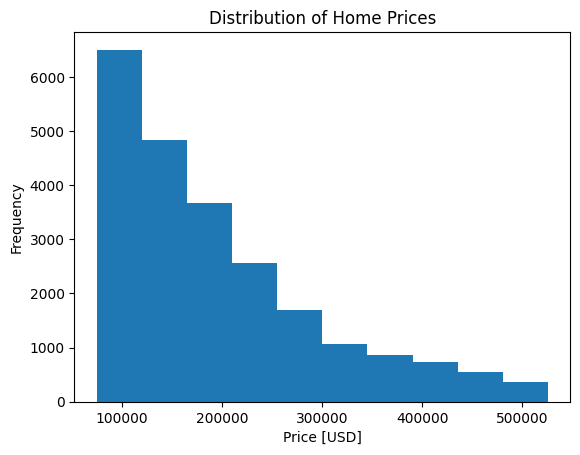

In [18]:
plt.hist(
    x=df["price_usd"]
)
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

TASK 3.3: Create a horizontal boxplot of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`.

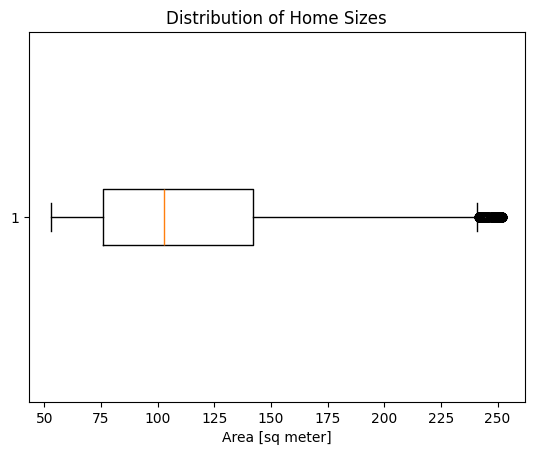

In [19]:
plt.boxplot(
    
    df["area_m2"],
    vert= False,
)
plt.xlabel("Area [sq meter]")
plt.title("Distribution of Home Sizes");

TASK 3.4: Use the `groupby` method to create a Series named `mean_price_by_region` that shows the mean home price in each region in Brazil, sorted from smallest to largest.

In [20]:
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values(ascending=True)

TASK 3.5: Use `mean_price_by_region` to create a bar chart. Make sure you label the x-axis as `"Region"` and the y-axis as `"Mean Price [USD]"` and give the chart the title `"Mean Home Price by Region"`.

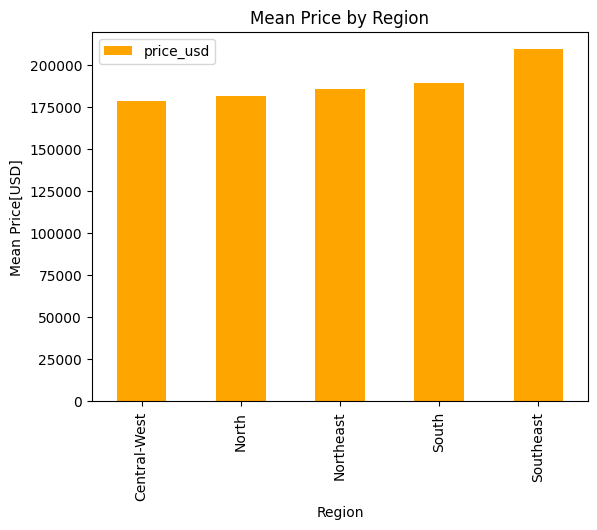

In [21]:
mean_price_by_region.plot(

    kind="bar",
    color="orange"

)
plt.legend()
plt.xlabel("Region")
plt.ylabel("Mean Price[USD]")
plt.title("Mean Price by Region");

You're now going to shift your focus to the southern region of Brazil and look at the relationship between home size and price.

TASK 3.7: Create a DataFrame `df_south` that contains all the homes from `df` that are in the `"South"` region.

In [22]:
df_south= df[df["region"]=="South"]
df_south

,property_type,region,area_m2,price_usd,lat,lon,state
9304,apartment,South,127.0,296448.850000,-25.455704,-49.292918,Paraná
9305,apartment,South,104.0,219996.250000,-25.455704,-49.292918,Paraná
9306,apartment,South,100.0,194210.500000,-25.460236,-49.293812,Paraná
9307,apartment,South,77.0,149252.940000,-25.460236,-49.293812,Paraná
9308,apartment,South,73.0,144167.750000,-25.460236,-49.293812,Paraná
...,...,...,...,...,...,...,...
9741,apartment,South,117.0,309763.761755,-26.966631,-48.636383,Santa Catarina
9742,house,South,110.0,88616.510972,-26.754795,-48.729183,Santa Catarina
9744,house,South,165.0,110770.645768,-27.454047,-48.411582,Santa Catarina
9745,apartment,South,65.0,86045.485893,-26.997210,-48.633877,Santa Catarina


TASK 3.8: Use the `value_counts` method to create a Series `homes_by_state` that contains the number of properties in each state in `df_south`.

In [23]:
homes_by_state = df["property_type"].value_counts()
homes_by_state

property_type
apartment    18463
house         4381
Name: count, dtype: int64

TASK 3.9: Create a scatter plot showing price vs. area for the state in `df_south` that has the largest number of properties. Be sure to label the x-axis `"Area [sq meters]"` and the y-axis `"Price [USD]"`; and use the title `"<name of state>: Price vs. Area"`

In [24]:
state_with_largest_property = df_south.groupby("state")["property_type"].count().sort_values(ascending=False)
state_with_largest_property

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: property_type, dtype: int64

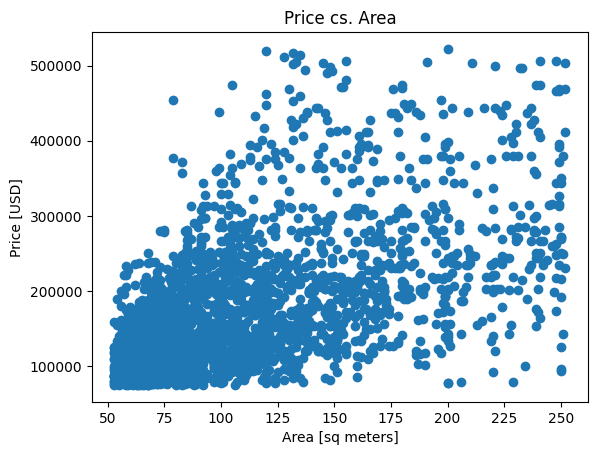

In [25]:
df_south_state = df[df['state'] =="Rio Grande do Sul" ]
plt.scatter(

    x= df_south_state.area_m2,
    y = df_south_state['price_usd']
)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price cs. Area");

TASK 3.9.1: Create a dictionary `south_states_corr`, where the keys are the names of the three states in the `"South"` region of Brazil, and their associated values are the correlation coefficient between `"area_m2"` and `"price_usd"` in that state.

As an example, here's a dictionary with the states and correlation coefficients for the Southeast region. Since you're looking at a different region, the states and coefficients will be different, but the structure of the dictionary will be the same.

As an example, here's a dictionary with the states and correlation coefficients for the Southeast region. Since you're looking at a different region, the states and coefficients will be different, but the structure of the dictionary will be the same.

```python
{'Espírito Santo': 0.6311332554173303,
 'Minas Gerais': 0.5830029036378931,
 'Rio de Janeiro': 0.4554077103515366,
 'São Paulo': 0.45882050624839366}
```

In [26]:
df_s = df_south[["state","area_m2","price_usd"]]
south_state = ["Rio Grande do Sul","Santa Catarina","Paraná"]
south_states_corr = {}
for state in south_state:
    state_data = df_s[df_s["state"]==state]
    correlation = state_data["price_usd"].corr(state_data["area_m2"])
    south_states_corr[state] = correlation

south_states_corr

{'Rio Grande do Sul': 0.5773267433717684,
 'Santa Catarina': 0.5068121776366781,
 'Paraná': 0.5436659935502658}